# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from citipy import citipy
import scipy.stats as st
from datetime import datetime

# Import API key
from api_keys import weather_api_key

## Generate Cities List

In [5]:
longtitude_ = 115.86 #Based on Perth

#Get random number of latitude with fixed longtitude
#Empty list to fill City
city_lst = []
country_lst = []
long_lst = []
latitude_lst = []


#generating random cities in the fixed longitutde

for i in range(5000): 
    #use Citipipy module 
    lat_ = np.random.uniform(-90,90)
    long_ = np.random.uniform(-180,180)
    latitude_lst.append(lat_)
    long_lst.append(long_)

    city = citipy.nearest_city(float(lat_), float(long_))
    country = city.country_code
    country_lst.append(country)
    city = city.city_name
    city_lst.append(city)
    


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Insert to dataframe for easy manipulations
city_df = pd.DataFrame({'country_code' : country_lst,
                        'city' : city_lst,
                        'lat' : latitude_lst,
                        'lng' : long_lst})


#Remove all duplicates
city_df = city_df.drop_duplicates(subset='city')
city_df = city_df.reset_index(drop=True)
city_df.index.names = ['City_ID']

# Create an empty list of temperatures
temperature_lst = [] 
humidity_lst = []
windspeed_lst = []
cloudiness_lst = []
date_lst = []

In [7]:
#counter
i = 0

# Loop through cities and assign to the empty list
for i in range(len(city_df)):
    query_url = url + 'lat=' + str(city_df.iloc[i,2]) + '&lon=' + str(city_df.iloc[i,3]) + '&appid=' + weather_api_key + "&units=metric"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #print(city_df.iloc[i,2])
    # Get temperature from JSON response
        
    temperature = weather_json["main"]["temp_max"]
    temperature_lst.append(temperature)

    humidity = weather_json["main"]["humidity"]
    humidity_lst.append(humidity)

    windspeed = weather_json["wind"]["speed"]
    windspeed_lst.append(humidity)

    cloudiness = weather_json["clouds"]['all']
    cloudiness_lst.append(cloudiness)

    date_ = weather_json["dt"]
    date_lst.append(date_)

# Populate DataFrame from the lists
city_df['date'] = date_lst
city_df['max_temp'] =  temperature_lst
city_df['humidity'] = humidity_lst
city_df['wind_speed'] = windspeed_lst
city_df['cloudiness'] =  cloudiness_lst

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Export out to csv
city_df.to_csv('cities.csv')

# Display Dataframe
city_df.head()

,country_code,city,lat,lng,date,max_temp,humidity,wind_speed,cloudiness
City_ID,,,,,,,,,
0,mg,taolanaro,-55.068682,61.721037,1651142411,1.32,73,73,71
1,pf,mataura,-70.082829,-145.302727,1651142411,-2.23,97,97,100
2,sj,barentsburg,88.974684,-6.388620,1651142411,-22.72,98,98,41
3,cn,zhumadian,32.903080,113.484903,1651142411,8.61,89,89,100
4,au,carnarvon,-29.826881,91.805235,1651142412,19.14,66,66,3


In [9]:
city_df.describe()

,lat,lng,date,max_temp,humidity,wind_speed,cloudiness
count,1489.000000,1489.000000,1.489000e+03,1489.000000,1489.000000,1489.000000,1489.000000
mean,19.528040,22.299967,1.651143e+09,17.056991,64.815984,64.815984,62.775688
std,32.573687,87.198045,8.109815e+01,14.062498,25.080510,25.080510,37.844431
min,-89.466010,-178.241733,1.651142e+09,-57.000000,4.000000,4.000000,0.000000
25%,-4.423570,-54.284212,1.651142e+09,6.830000,51.000000,51.000000,27.000000
50%,20.386964,27.495419,1.651143e+09,20.970000,72.000000,72.000000,78.000000
75%,47.025291,97.769587,1.651143e+09,27.380000,82.000000,82.000000,99.000000
max,89.638298,179.964649,1.651143e+09,44.600000,100.000000,100.000000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.

# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if city_df.loc[city_df['humidity']>100].empty:
    print ('No cities that have humidty > 100%')
    clean_city_df = city_df
else:
    clean_city_df = city_df.drop(city_df[city_df.humidity > 100].index, inplace=True)


# Get the date from the data was taken 
dt = datetime.fromtimestamp(clean_city_df['date'][0])
dt = datetime.date(dt)



No cities that have humidty > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

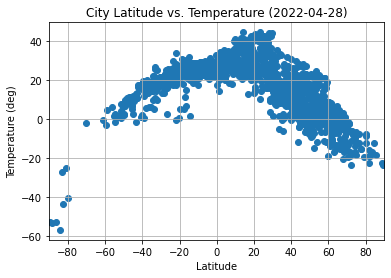

In [11]:
# Create a Scatter Plot for temperature vs latitude
x_values = clean_city_df['lat']
y_values = clean_city_df['max_temp']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.xlim([-90,90])
plt.grid()
plt.title(f'City Latitude vs. Temperature ({dt})')
plt.savefig('Fig1 - Latitude vs. Temperature Plot.png')
plt.show()


## Latitude vs. Humidity Plot

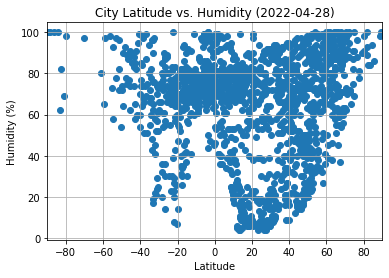

In [12]:
x_values = clean_city_df['lat']
y_values = clean_city_df['humidity']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.xlim([-90,90])
plt.show
plt.title(f'City Latitude vs. Humidity ({dt})')
plt.savefig('Fig2 - Latitude vs. Humidity Plot.png')
plt.show()


## Latitude vs. Cloudiness Plot

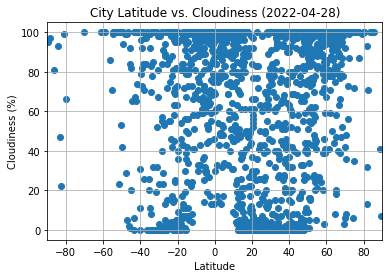

In [13]:
x_values = clean_city_df['lat']
y_values = clean_city_df['cloudiness']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.xlim([-90,90])
plt.show
plt.title(f'City Latitude vs. Cloudiness ({dt})')
plt.savefig('Fig3 - Latitude vs. Cloudiness Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

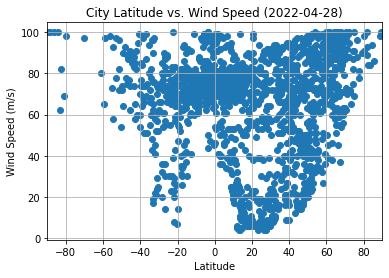

In [14]:
x_values = clean_city_df['lat']
y_values = clean_city_df['wind_speed']
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
plt.xlim([-90,90])
plt.show
plt.title(f'City Latitude vs. Wind Speed ({dt})')
plt.savefig('Fig4 - Latitude vs. Wind Speed Plot.png')
plt.show()

## Linear Regression

In [15]:
# Filter DataFrame, Northen hemispere cities are latitude > 0 and Southern Hemispwhere latitude < 0. 
north_hemi = clean_city_df.loc[clean_city_df['lat'] >= 0]
south_hemi = clean_city_df.loc[clean_city_df['lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6991907889319873
The correlation between both factors is -0.84


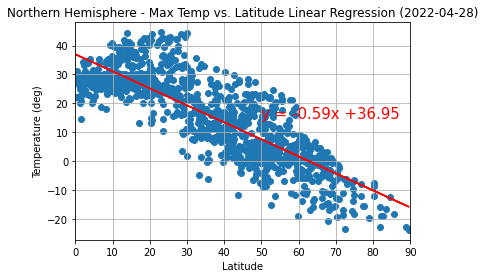

The linear regression showing a strong linear correlation, the equation of line is likely to give a reasonable answer for other latitudes
Based on this model, we can say that the temperature decreases as we go lower up the latitude from the equator


In [16]:
x_values = north_hemi['lat']
y_values = north_hemi['max_temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

#analysis note
print('The linear regression showing a strong linear correlation, the equation of line is likely to give a reasonable answer for other latitudes')
print('Based on this model, we can say that the temperature decreases as we go lower up the latitude from the equator')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6670486764198651
The correlation between both factors is 0.82


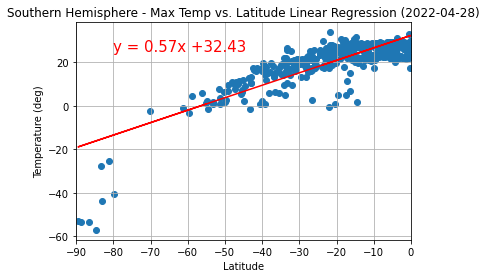

The linear regression showing a strong linear correlation, the equation of line is likely to give a reasonable answer for other latitudes
Based on this model, we can say that the temperature decreases as we go lower down the latitude from the equator
Not an equal set of data between North and South, but given the the norhtern trend South trend is likely to follow


In [17]:
x_values = south_hemi['lat']
y_values = south_hemi['max_temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Temperature (deg)')
plt.annotate(line_eq,(-80,25),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

#analysis note
print('The linear regression showing a strong linear correlation, the equation of line is likely to give a reasonable answer for other latitudes')
print('Based on this model, we can say that the temperature decreases as we go lower down the latitude from the equator')
print('Not an equal set of data between North and South, but given the the norhtern trend South trend is likely to follow')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05574402172317735
The correlation between both factors is 0.24


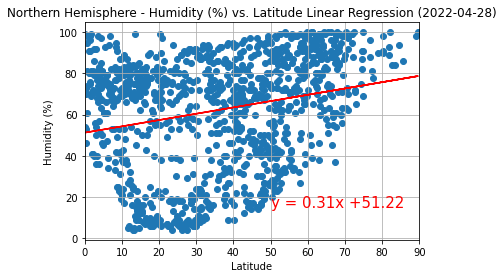

The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters


In [18]:
x_values = north_hemi['lat']
y_values = north_hemi['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

#analysis note
print('The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0004295804589218497
The correlation between both factors is -0.02


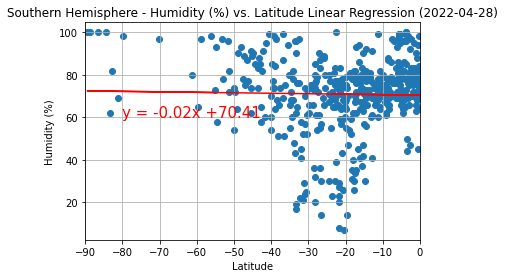

The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters


In [19]:
x_values = south_hemi['lat']
y_values = south_hemi['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-80,60),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

#analysis note
print('The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03725130763857617
The correlation between both factors is 0.19


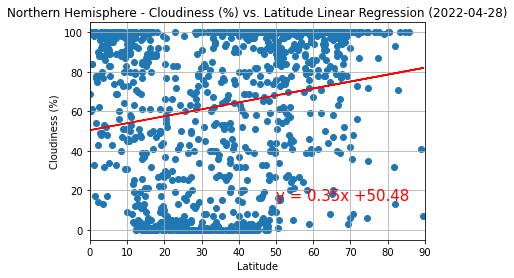

The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters


In [20]:
x_values = north_hemi['lat']
y_values = north_hemi['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

#analysis note
print('The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006900361455606114
The correlation between both factors is 0.08


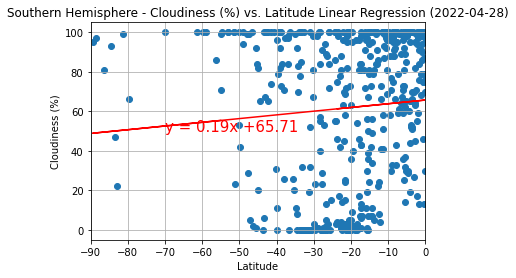

The linear regression showing no correlation, we cannot use linear regression model for this parameters


In [21]:
x_values = south_hemi['lat']
y_values = south_hemi['cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-70,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

#analysis note
print('The linear regression showing no correlation, we cannot use linear regression model for this parameters')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05574402172317735
The correlation between both factors is 0.24


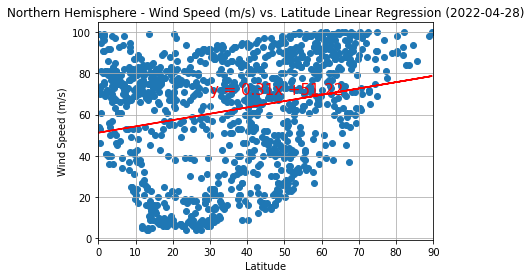

The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters


In [22]:
x_values = north_hemi['lat']
y_values = north_hemi['wind_speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([0,90])

# Label plot and annotate the line equation
plt.title(f'Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(30,70),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()
#analysis note
print('The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0004295804589218497
The correlation between both factors is -0.02


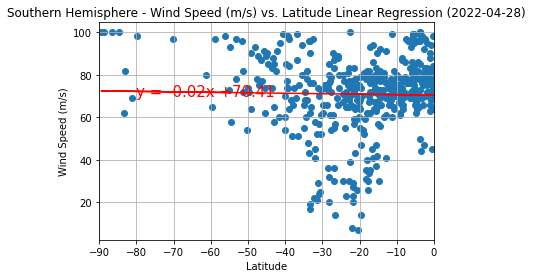

The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters


In [23]:
x_values = south_hemi['lat']
y_values = south_hemi['wind_speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.figure(facecolor="w")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.grid()
plt.xlim([-90,0])

# Label plot and annotate the line equation
plt.title(f'Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression ({dt})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(-80,70),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

print('The linear regression showing weak/no correlation, we cannot use linear regression model for this parameters')

OBSERVATIONS

From looking at the linear regression models, we can say that other than the temperature other parameters such as cloudiness, humidity and wind speed have very weak to no correlation with the latitude. 

The temperature correlation shows us that the further away you are from the equator the lower the temperature becomes. Which is true as the artics are cold and as you move up/down it starts getting warmer until the equator. 